In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt

from catboost import CatBoostClassifier
import xgboost as xgb

import shap

from sklearn.metrics import accuracy_score,confusion_matrix

#set figure background to white
plt.rcParams.update({'figure.facecolor':'white'})

# Dataset

In [2]:
#load data 
data = pd.read_csv("../../data/mushrooms.csv")

#get features
y = data['class']
y = y.astype('category').cat.codes
X = data.drop('class', axis=1)

print(len(data))
data.head()

8124


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# XGBoost

In [3]:
# Create dummy variables for the categorical features
X_dummy = pd.get_dummies(X)

In [4]:
# Fit model
model = xgb.XGBClassifier()
model.fit(X_dummy, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

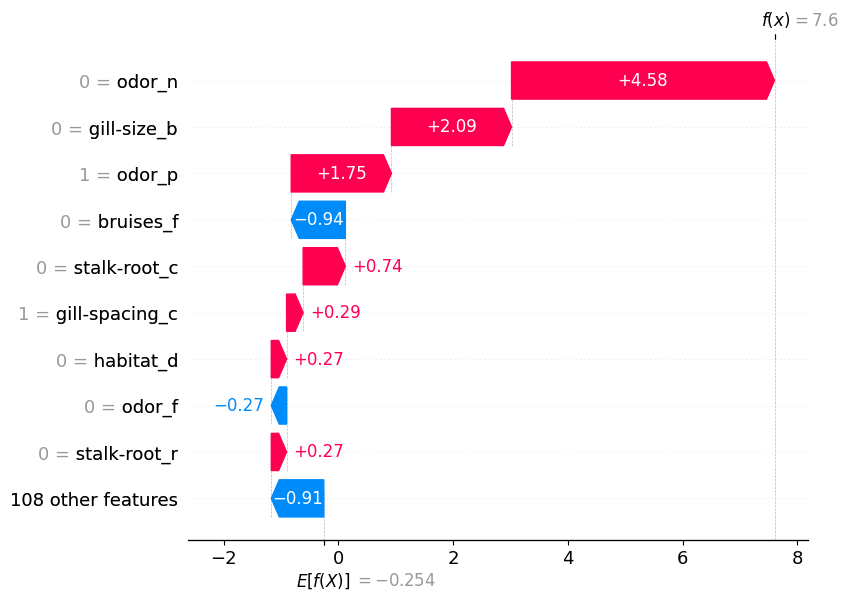

In [5]:
#Get SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(X_dummy)

# Display SHAP values for the first observation
shap.plots.waterfall(shap_values[0])

# CatBoost

In [6]:
model = CatBoostClassifier(iterations=20,
                           learning_rate=0.01,
                           depth=3)

# train model
cat_features = list(range(len(X.columns)))
model.fit(X, y, cat_features)

0:	learn: 0.6660194	total: 82.6ms	remaining: 1.57s
1:	learn: 0.6373576	total: 87.9ms	remaining: 791ms
2:	learn: 0.6125475	total: 92.4ms	remaining: 524ms
3:	learn: 0.5880232	total: 95.4ms	remaining: 382ms
4:	learn: 0.5652512	total: 99.8ms	remaining: 299ms
5:	learn: 0.5428184	total: 106ms	remaining: 247ms
6:	learn: 0.5222711	total: 111ms	remaining: 205ms
7:	learn: 0.5016943	total: 114ms	remaining: 171ms
8:	learn: 0.4779907	total: 117ms	remaining: 143ms
9:	learn: 0.4601680	total: 121ms	remaining: 121ms
10:	learn: 0.4447001	total: 124ms	remaining: 101ms
11:	learn: 0.4281286	total: 127ms	remaining: 84.9ms
12:	learn: 0.4125468	total: 130ms	remaining: 70.3ms
13:	learn: 0.3990776	total: 134ms	remaining: 57.6ms
14:	learn: 0.3861614	total: 139ms	remaining: 46.3ms
15:	learn: 0.3724813	total: 144ms	remaining: 36ms
16:	learn: 0.3560532	total: 147ms	remaining: 25.9ms
17:	learn: 0.3448969	total: 150ms	remaining: 16.7ms
18:	learn: 0.3331749	total: 156ms	remaining: 8.19ms
19:	learn: 0.3218024	total: 16

In [7]:
#Get SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(X)

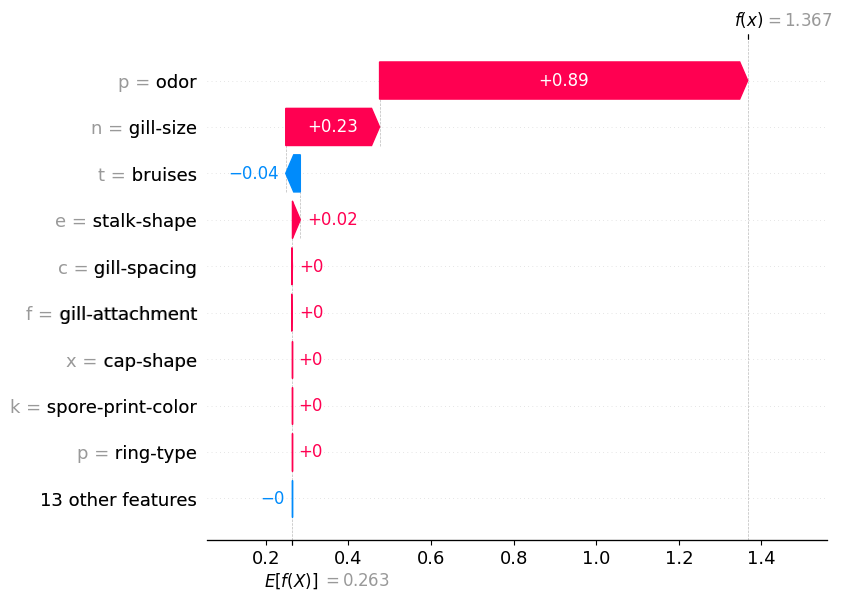

In [8]:
# Display SHAP values for the first observation
shap.plots.waterfall(shap_values[0])

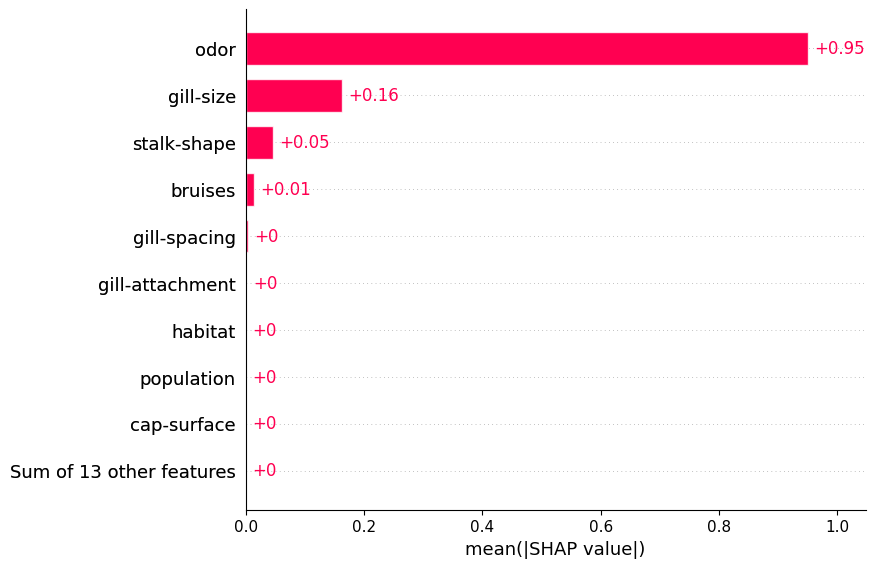

In [9]:
# Mean SHAP 
shap.plots.bar(shap_values)

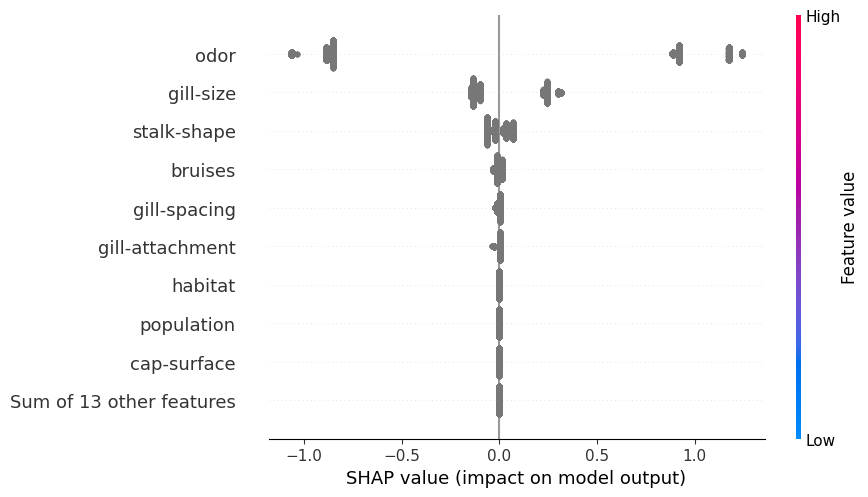

In [10]:
# Beeswarm plot 
shap.plots.beeswarm(shap_values)